In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading all the data
X_train = pd.read_csv('/root/Desktop/Research Set/X_train.csv', sep= ' ', header=None)
X_test = pd.read_csv('/root/Desktop/Research Set/X_test.csv', sep= ' ', header=None)
y_train = pd.read_csv('/root/Desktop/Research Set/y_train.csv', header=None)
y_test = pd.read_csv('/root/Desktop/Research Set/y_test.csv', header=None)

In [3]:
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [5]:
y2 = y

In [6]:
y2 = np.asarray(y2)

In [7]:
y2 = pd.DataFrame(y2)

In [8]:
y2[0][367]

2

In [9]:
for i in range(0, len(y2)):
    if(y2[0][i] == 1):
        y2[0][i] = 'Walking'
    elif(y2[0][i] == 2):
        y2[0][i] = 'Walking Upstairs'
    elif(y2[0][i] == 3):
        y2[0][i] = 'Walking Downstairs'
    elif(y2[0][i] == 4):
        y2[0][i] = 'Sitting'
    elif(y2[0][i] == 5):
        y2[0][i] = 'Standing'
    elif(y2[0][i] == 6):
        y2[0][i] = 'Laying'
    elif(y2[0][i] == 7):
        y2[0][i] = 'Stand To Sit'
    elif(y2[0][i] == 8):
        y2[0][i] = 'Sit To Stand'
    elif(y2[0][i] == 9):
        y2[0][i] = 'Sit To Lie'
    elif(y2[0][i] == 10):
        y2[0][i] = 'Lie To Sit'
    elif(y2[0][i] == 11):
        y2[0][i] = 'Stand To Lie'
    elif(y2[0][i] == 12):
        y2[0][i] = 'Lie To Stand'

In [10]:
X.shape

(10929, 561)

In [11]:
#PCA algorithm being used for the dimensionality reduction process in the given case
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
X_trans = pca.transform(X)

In [14]:
X_trans = pd.DataFrame(X_trans, columns = ['F1', 'F2'])

In [15]:
X_trans.head()

,F1,F2
0,-5.407597,-0.013310
1,-5.446587,-0.397406
2,-5.396125,-0.896960
3,-5.584420,-1.306291
4,-5.643893,-1.578576


In [16]:
X_trans['label'] = y2[0]

In [17]:
X_trans.tail()

,F1,F2,label
10924,4.038259,0.908505,Walking Upstairs
10925,4.563269,0.464078,Walking Upstairs
10926,4.166619,0.631964,Walking Upstairs
10927,3.429063,0.705315,Walking Upstairs
10928,3.620265,0.473370,Walking Upstairs


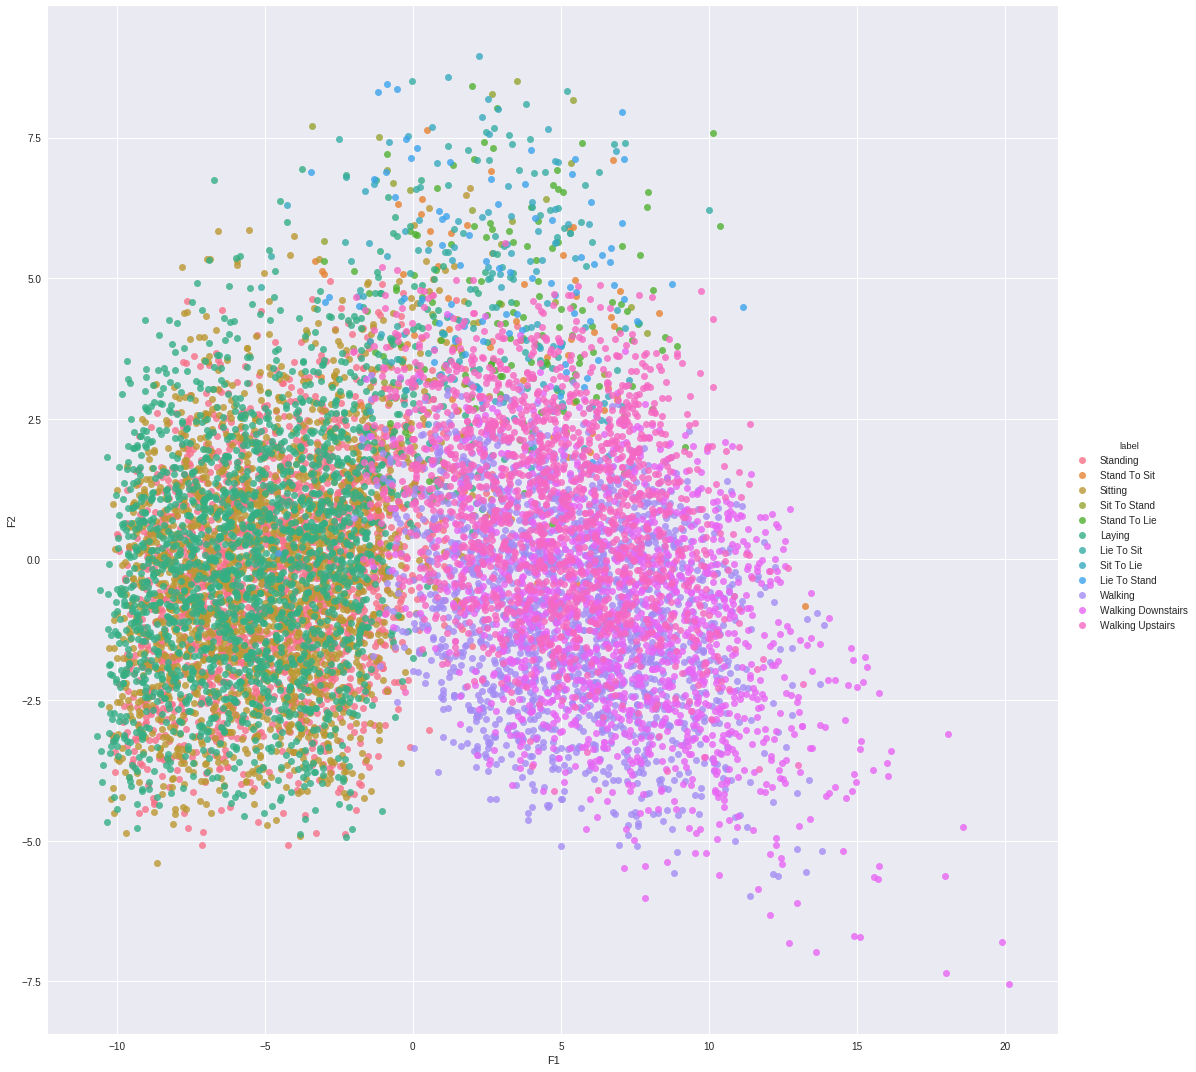

In [40]:
sns.lmplot(x = 'F1', y = 'F2', data = X_trans, hue = 'label',  fit_reg = False, x_jitter = 4.25, y_jitter = 2.4, size = 15)

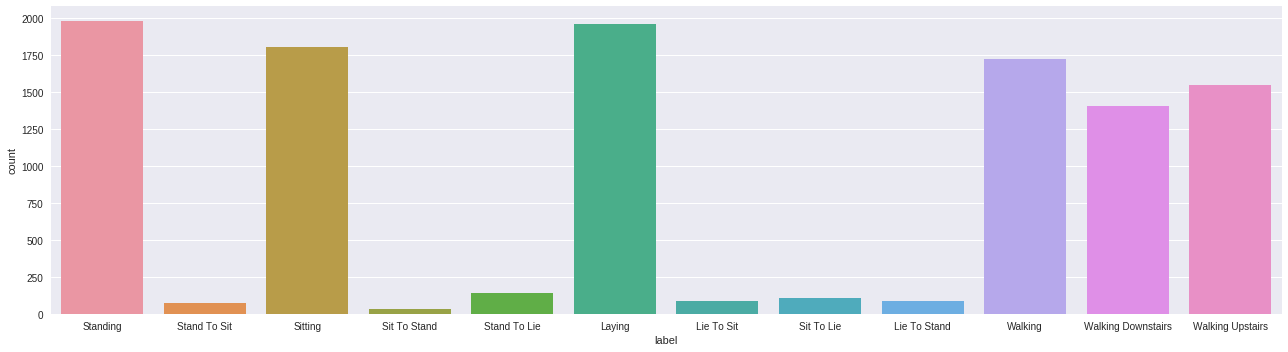

In [24]:
plt.figure(figsize = (18, 5))
sns.countplot(x = 'label', data = X_trans)
plt.tight_layout()

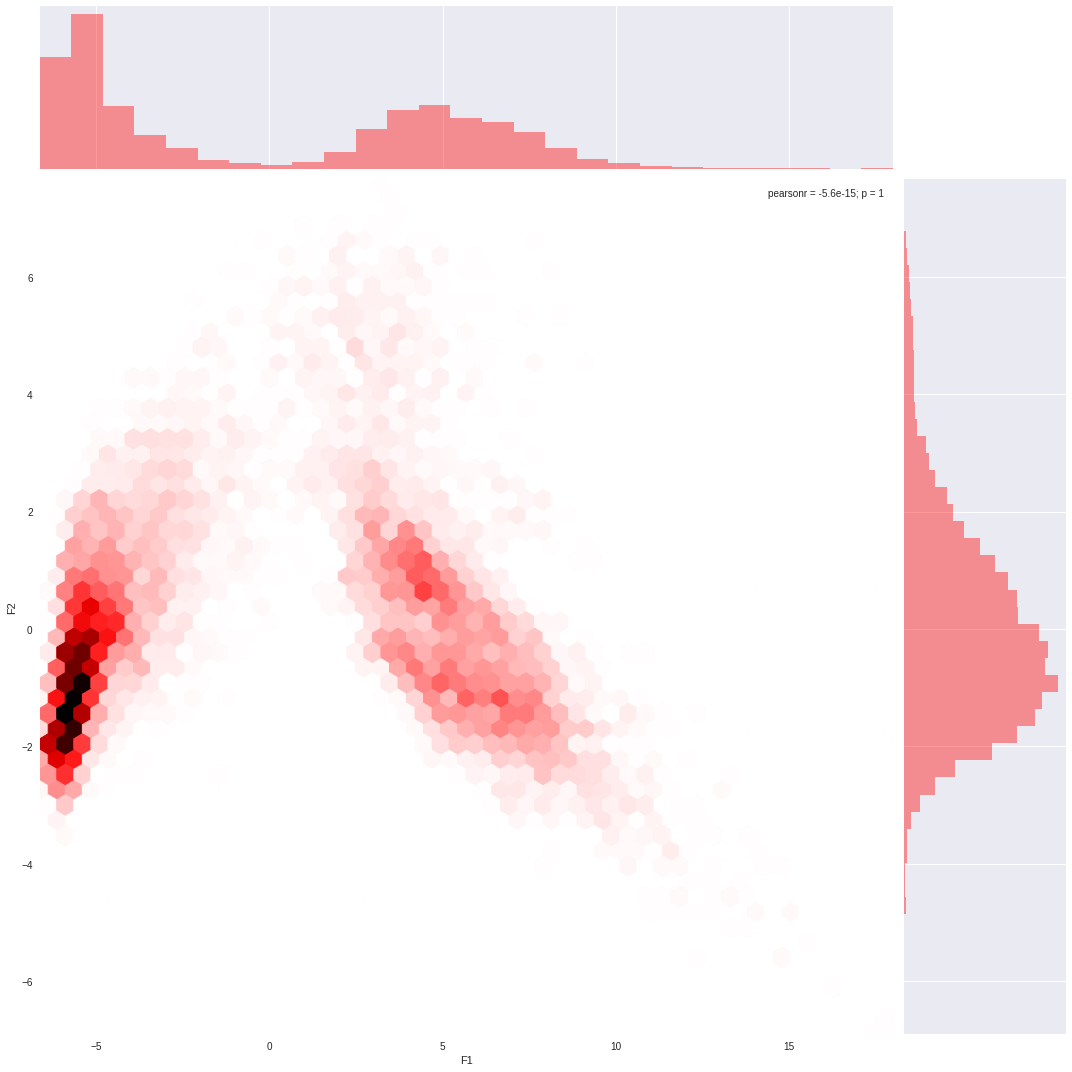

In [42]:
#jointplot for the data
plt.figure(figsize = (15, 10))
sns.jointplot(x= 'F1', y = 'F2', data = X_trans, kind = 'hex', color = 'red', size = 15 )
plt.tight_layout()

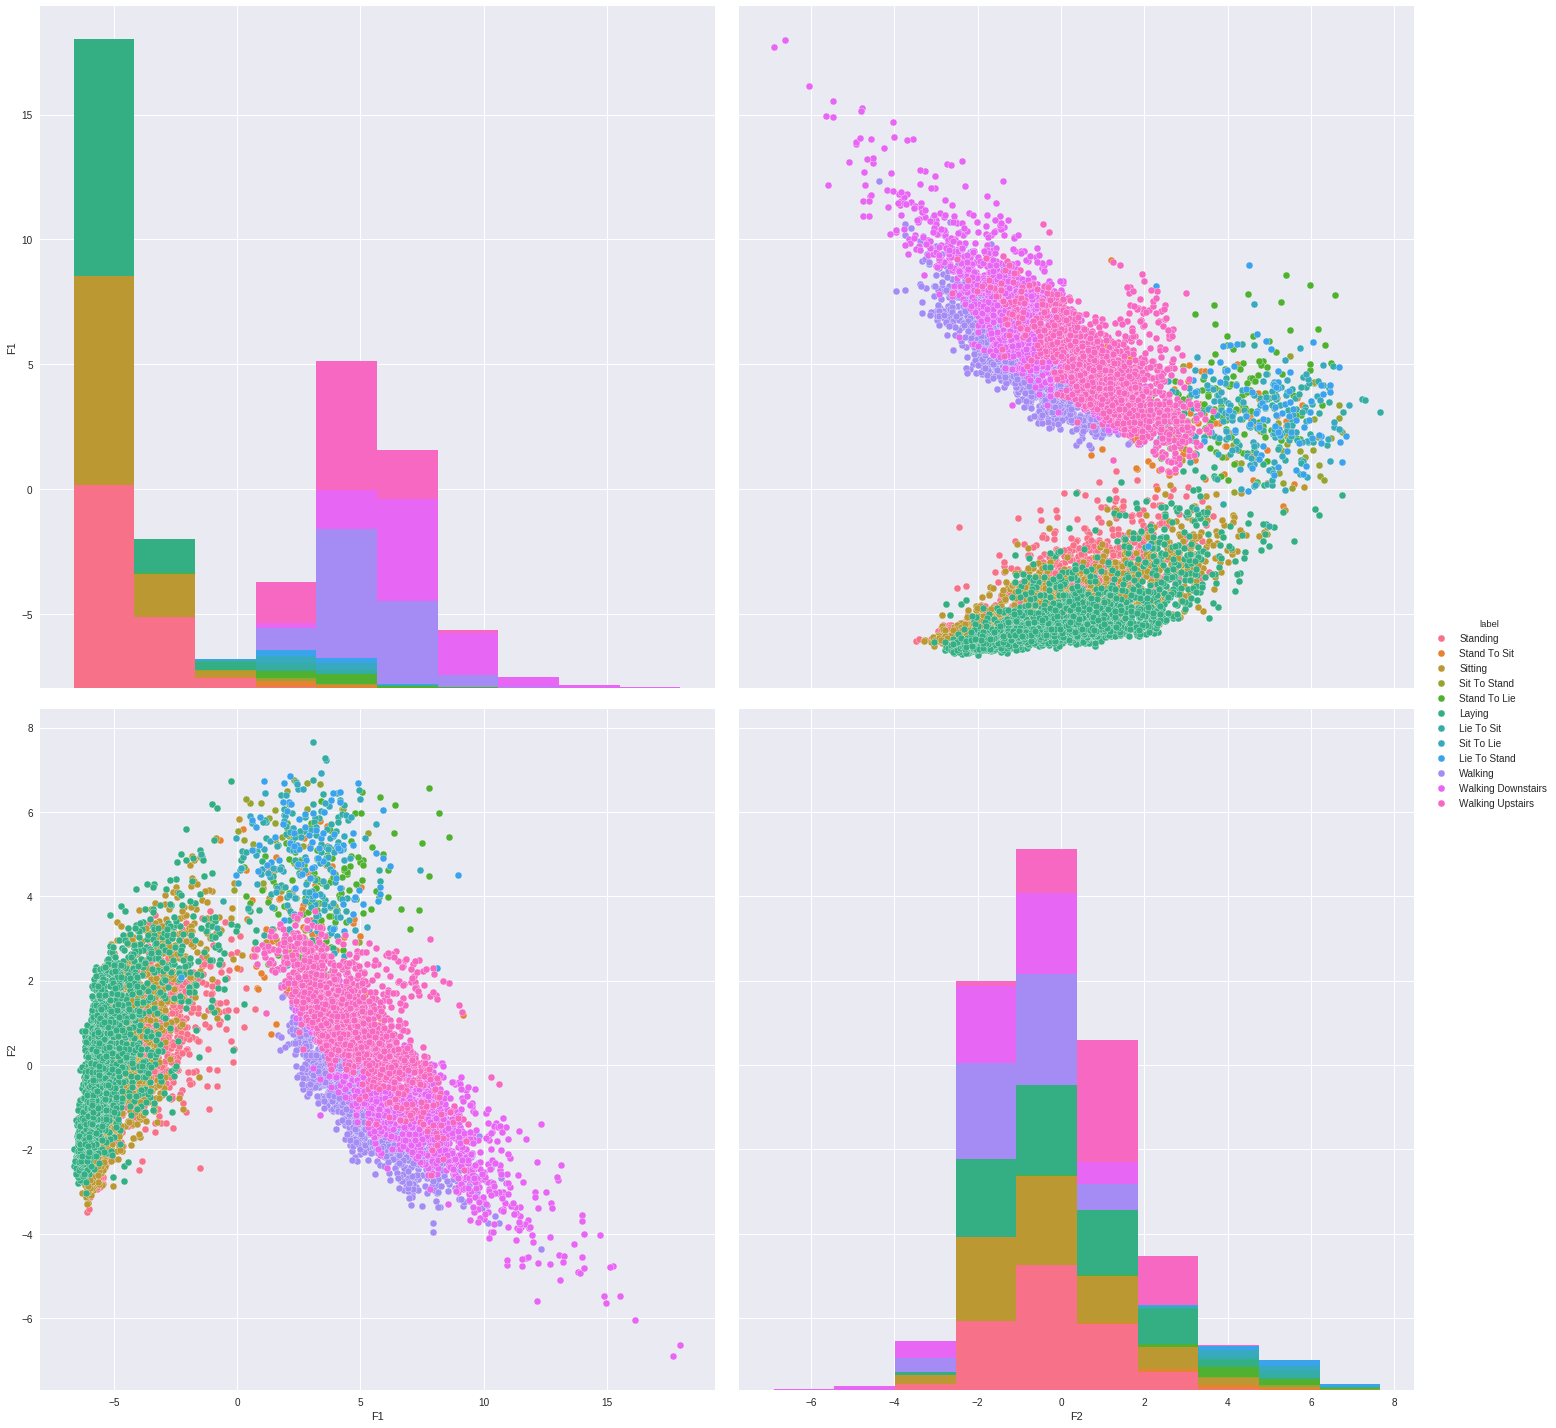

In [44]:
plt.figure(figsize = (10, 10))
sns.pairplot(X_trans, hue = 'label', size = 10)

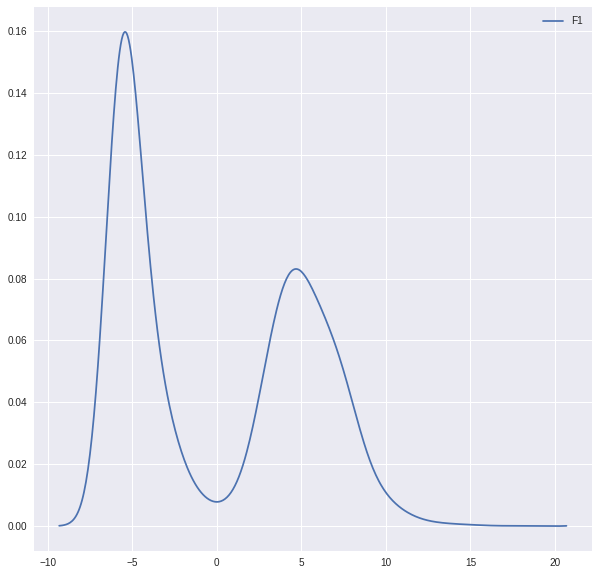

In [46]:
#KDE plot
plt.figure(figsize = (10,10))
sns.kdeplot(X_trans['F1'], gridsize = 500)

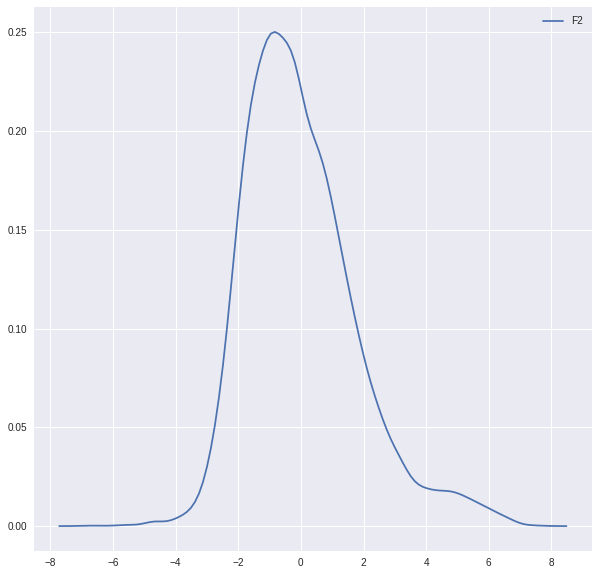

In [48]:
plt.figure(figsize = (10, 10))
sns.kdeplot(X_trans['F2'])

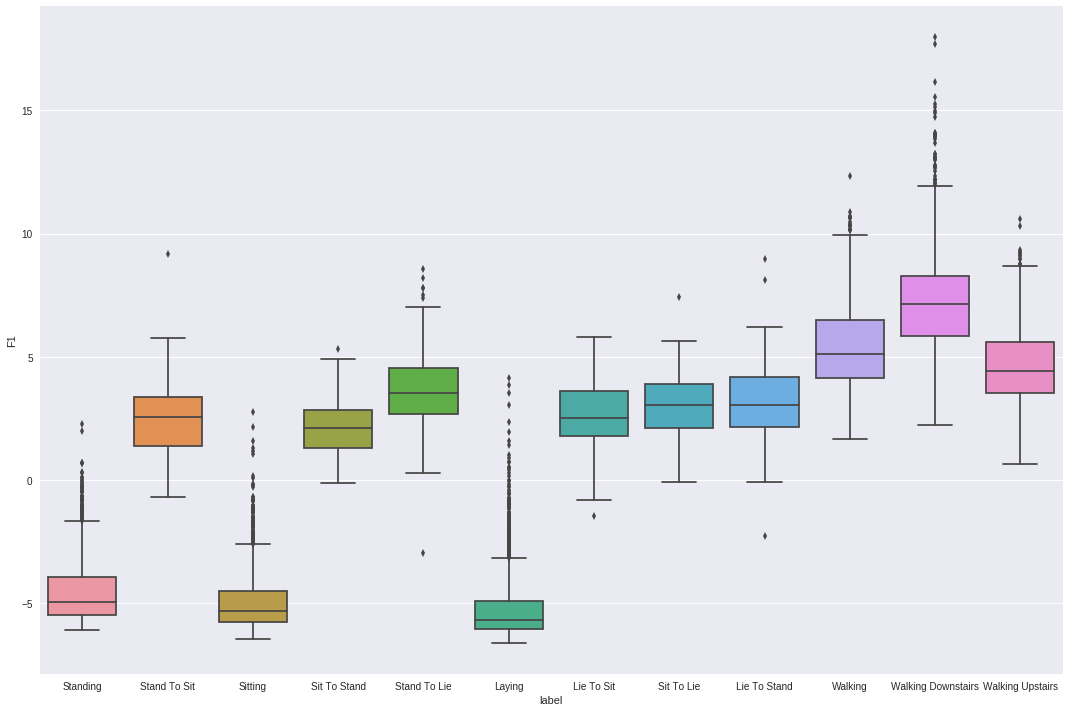

In [31]:
#Boxplot
#Here x needs to be categorical and y needs to be continuous
#Points outside the whiskers are the outliers
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'label', y ='F1', data = X_trans)
plt.tight_layout()

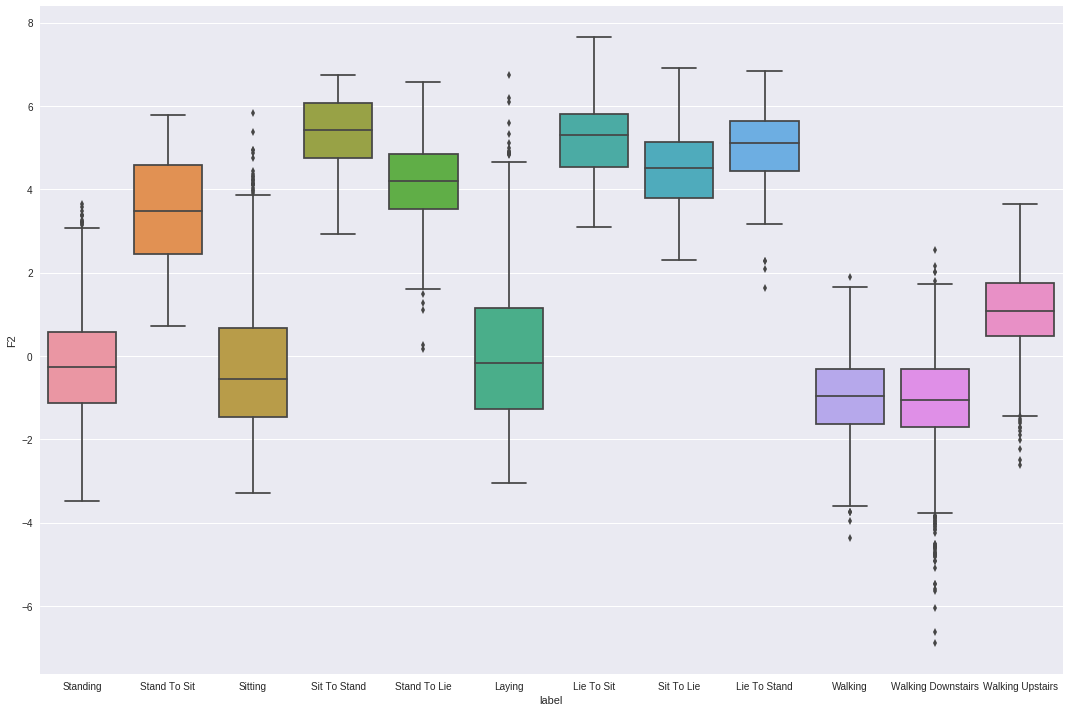

In [32]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'label', y ='F2', data = X_trans)
plt.tight_layout()

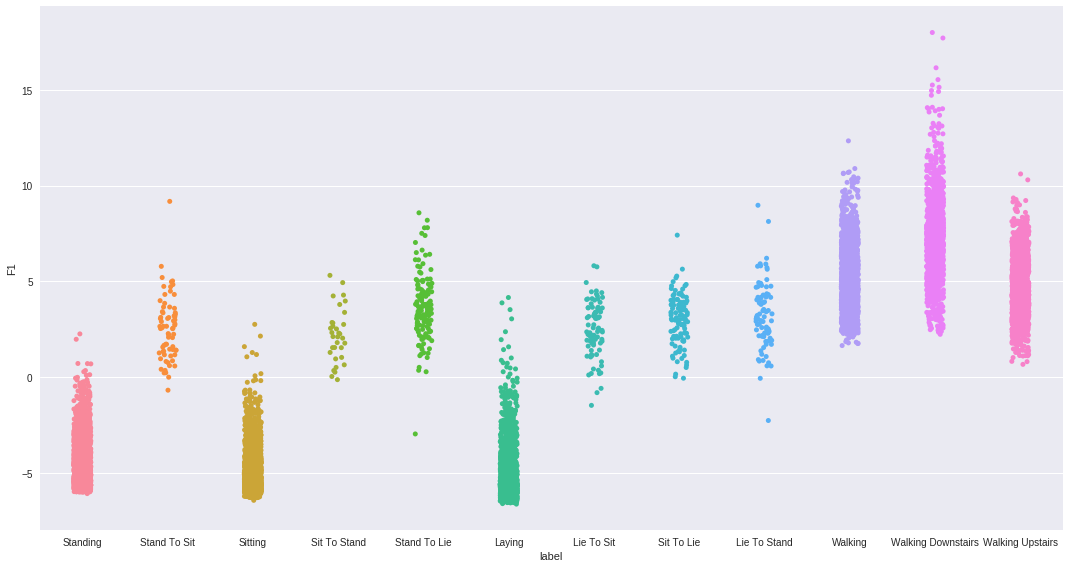

In [51]:
#Jitter argument actually introduces a bit of noise so that points become separate from each other
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F1', data = X_trans, jitter = True, split = True)
plt.tight_layout()

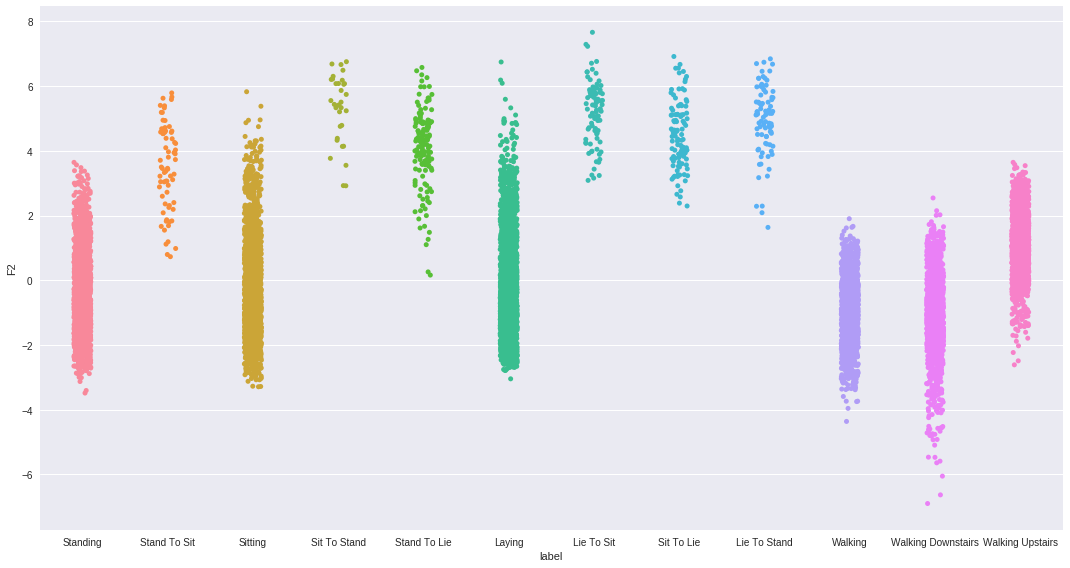

In [52]:
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F2', data = X_trans, jitter = True, split = True)
plt.tight_layout()

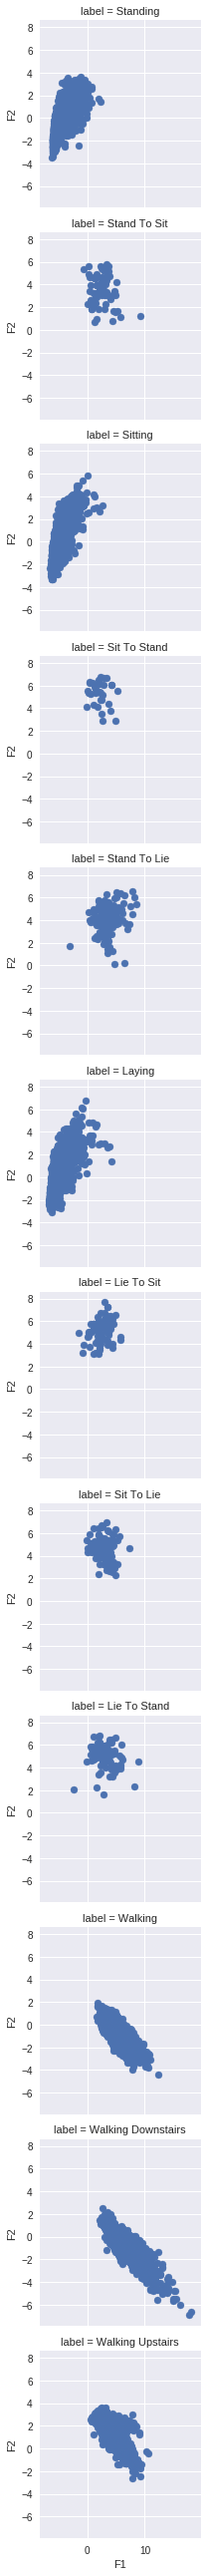

In [57]:
#Drawing another FacetGrid plot
#plt.figure(figsize = (15, 10))
g = sns.FacetGrid(data = X_trans, row = 'label')
g.map(plt.scatter, 'F1', 'F2')

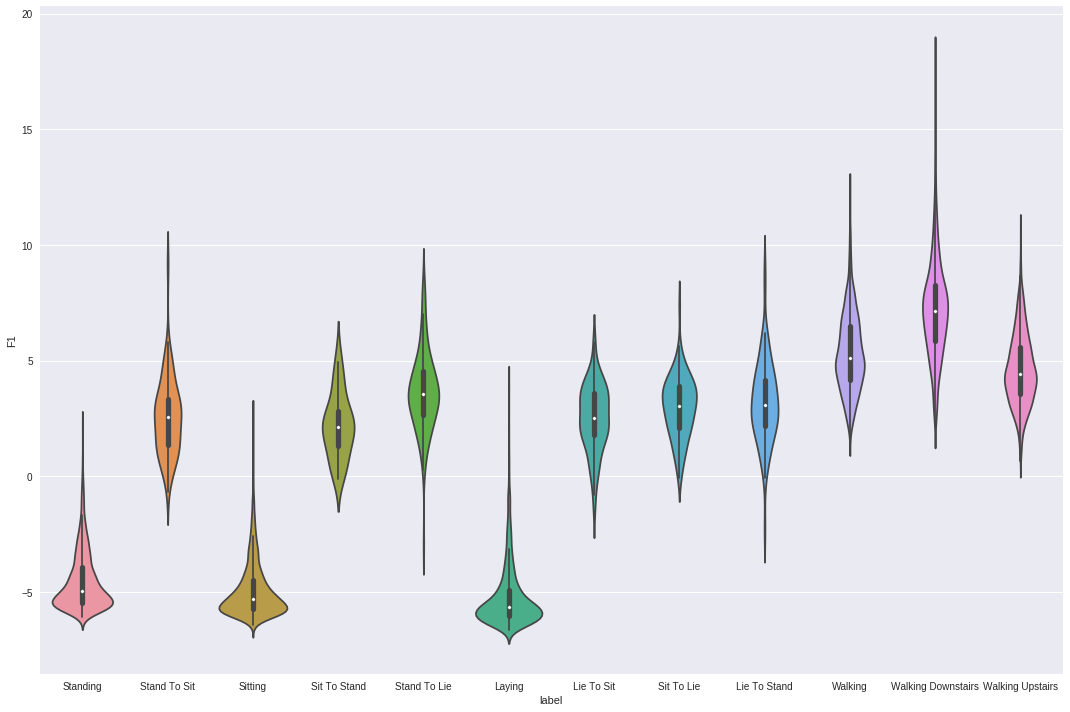

In [61]:
#Violin Plot, which is very similar to Boxplot
#Parameters are similar to boxplot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F1', data = X_trans)
plt.tight_layout()

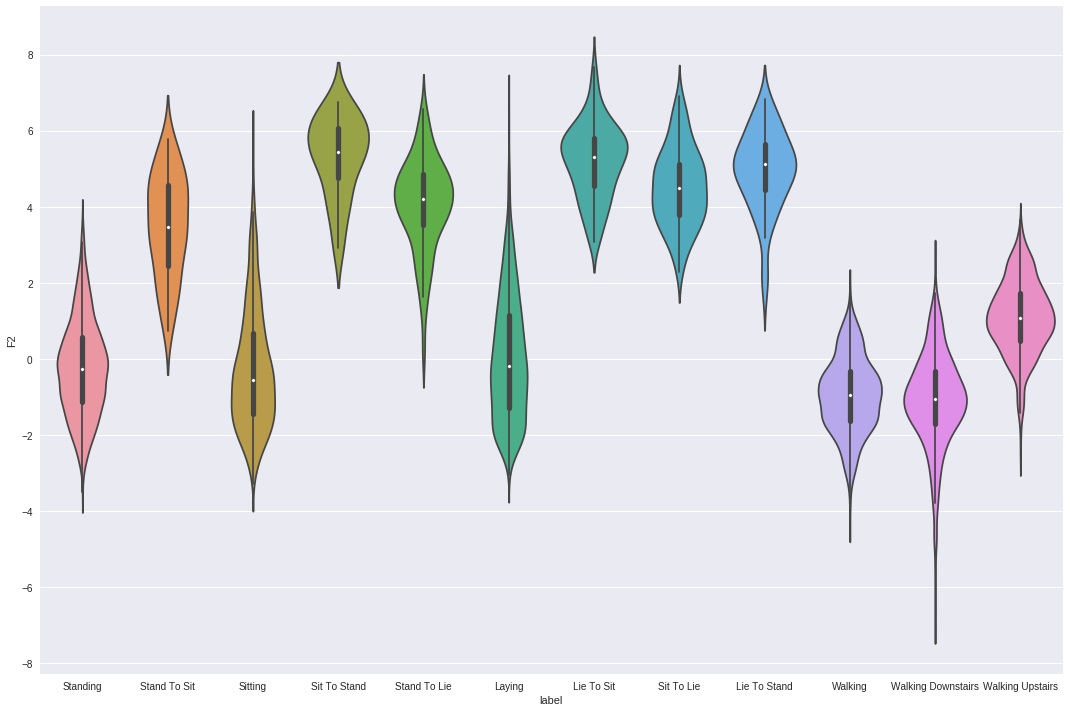

In [62]:
#Violin Plot, which is very similar to Boxplot
#Parameters are similar to boxplot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F2', data = X_trans)
plt.tight_layout()